# Import

In [2]:
# Python
import numpy as np
import pandas as pd
import time
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# RDKit
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdMolDescriptors import GetHashedMorganFingerprint
from rdkit.Chem.Draw import rdMolDraw2D

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [3]:
from rdkit.Chem.Draw import IPythonConsole
from ipywidgets import interact,fixed,IntSlider
def renderFpBit(mol,bitIdx,bitInfo,fn):
    bid = bitIdx
    return(display(fn(mol,bid,bitInfo)))
def get_index_of_array_that_contain_1_in_any_position(list1):
    result = []
    for i, e in enumerate(list1):
        if e > 0:
            result.append(i)
    return result

In [4]:
def show_mol(d2d,mol,legend='',highlightAtoms=[]):
    d2d.DrawMolecule(mol,legend=legend, highlightAtoms=highlightAtoms)
    d2d.FinishDrawing()
    bio = BytesIO(d2d.GetDrawingText())
    return Image.open(bio)
def show_images(imgs,buffer=5):
    height = 0
    width = 0
    for img in imgs:
        height = max(height,img.height)
        width += img.width
    width += buffer*(len(imgs)-1)
    res = Image.new("RGBA",(width,height))
    x = 0
    for img in imgs:
        res.paste(img,(x,0))
        x += img.width + buffer
    return res
from io import BytesIO

# X=Y Test

In [6]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Test_Data_Visualization.xlsx", sheet_name="showAllCH_test")


In [7]:
df_visual

,Group,Normal Boiling Point [K] (Actual),Normal Boiling Point [K] (Predict),Unnamed: 3,Unnamed: 4,Unnamed: 5,Test Set
0,Previous Work,278.25,283.728881,NaN,NaN,NaN,NaN
1,Previous Work,293.25,303.945528,NaN,NaN,NaN,NaN
2,Previous Work,301.35,310.234528,NaN,NaN,NaN,NaN
3,Previous Work,309.05,310.234528,NaN,NaN,NaN,NaN
4,Previous Work,310.05,308.191528,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
195,This Work,471.65,470.548500,NaN,NaN,NaN,NaN
196,This Work,447.25,455.108300,NaN,NaN,NaN,NaN
197,This Work,477.35,476.940900,NaN,NaN,NaN,NaN
198,This Work,497.15,496.047450,NaN,NaN,NaN,NaN


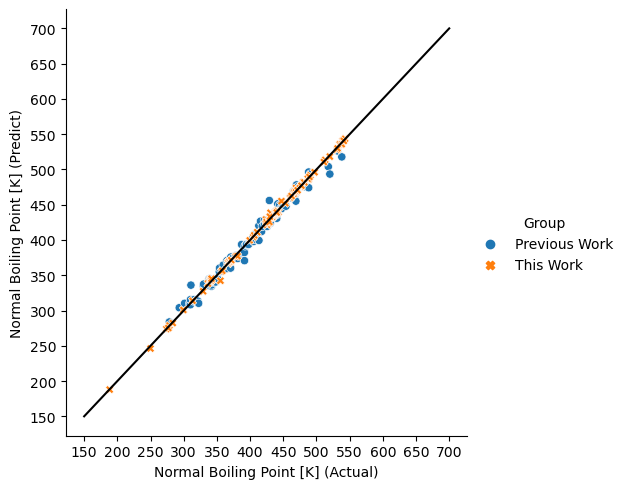

In [8]:
g= sns.relplot(
    data=df_visual, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    #col="Group", col_wrap=2,
    hue="Group",
    style="Group",
    #palette="rocket_r",
    kind="scatter", 
    #legend=False,
    aspect=1
    
)

axes = g.fig.axes
x = np.arange(150, 750, 50)
y = np.arange(150, 750, 50)
for ax in axes:
    ax.plot(x, y,"k-")
    ax.set_xticks(np.arange(150, 750, 50))
    ax.set_yticks(np.arange(150, 750, 50))
plt.show()

# X=Y All

In [9]:
import seaborn as sns
import pandas as pd
df_visual = pd.read_excel("../../[Use] Main File (Run Fingerprint)/Test_Data_Visualization.xlsx", sheet_name="showAllCH")


In [10]:
df_visual

,Group,Normal Boiling Point [K] (Actual),Normal Boiling Point [K] (Predict)
0,Previous Work,111.65,126.190291
1,Previous Work,169.45,189.434405
2,Previous Work,184.55,184.302405
3,Previous Work,188.45,194.337405
4,Previous Work,225.55,234.893695
...,...,...,...
1115,This Work,471.65,470.548500
1116,This Work,447.25,455.108300
1117,This Work,477.35,476.940900
1118,This Work,497.15,496.047450


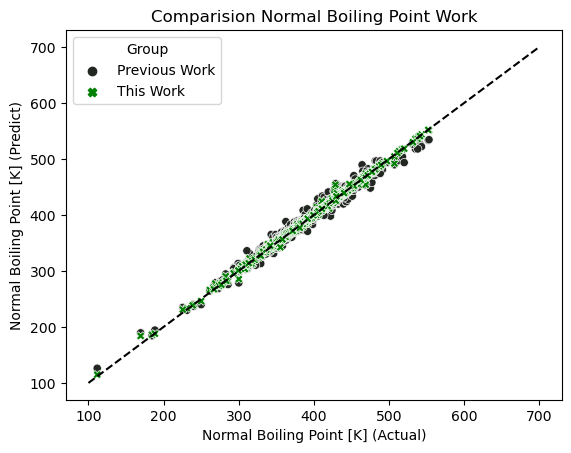

In [12]:
g= sns.scatterplot(
    data=df_visual, x="Normal Boiling Point [K] (Actual)", y="Normal Boiling Point [K] (Predict)",
    #col="Group", col_wrap=2,
    hue="Group",
    style="Group",
    #palette="dark:salmon_r",
    palette="dark:green",
    #sizes=(500, 200),
    #kind="scatter", 
    #legend=False,
    #legend="full",
    #scatter_kws={"color":"darkred","alpha":0.3,"s":200},
    #aspect=1
    
)

#plt.legend(loc='upper left')

#axes = g.fig.axes
#sns.move_legend(axes, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
x = np.arange(100, 750, 50)
y = np.arange(100, 750, 50)
g.plot(x, y,"k--")
for ax in axes:
    ax.set_xticks(np.arange(100, 750, 50))
    ax.set_yticks(np.arange(100, 750, 50))
plt.legend(loc='upper left', title='Group')
plt.title("Comparision Normal Boiling Point Work")
plt.show()